#### Import the necessary libraries and load the spacy model

In [38]:
import spacy
import pandas as pd
from nltk.probability import FreqDist
from IPython.display import Image

nlp = spacy.load("en_core_web_sm")

#### Read in the corpus df
##### channel variable is for the name of the output file (I named it 'world' when gettting frequencies for the whole corpus)
##### the 'part_of_speech' variable is also for the output file name
##### the channel_in_df variable is to get the frequencies only for one subcorpus (not needed for whole corpus)

In [57]:
channel = 'World'
part_of_speech = 'noun'
# channel_in_df = 'WION (IN)'

df = pd.read_csv('world_news_720_df.csv')
# df = df[df['channel'] == channel_in_df] 
df

,channel,month,video_id,text
0,ABC News (US),12,--sFZN1xtq8,the columbia university graduate student fatal...
1,ABC News (US),2,-0qdRgEgJ7I,thousands of vaccinations put on hold because ...
2,ABC News (US),6,-I2WzhJd8sA,now to the coronavirus in the u.s and tonight ...
3,ABC News (US),4,-KXJ5xtNWYM,president biden is expected to announce an end...
4,ABC News (US),2,-SY4LK_Isv8,finally tonight hidden no more tonight history...
...,...,...,...,...
8281,WION (IN),2,zGCtBh1Ts0A,u.s authorities arrested the wife of jailed me...
8282,WION (IN),9,zIIuekiAd9I,and countries across the globe have been react...
8283,WION (IN),11,zMuMcDNfu7M,archaeologists have hailed a latest discovery ...
8284,WION (IN),6,zsN_XMQTRmE,and the u.s troops withdrawal from afghanistan...


#### Specify the column in the dataframe to read the texts from

In [58]:
texts = df['text']
texts

0       the columbia university graduate student fatal...
1       thousands of vaccinations put on hold because ...
2       now to the coronavirus in the u.s and tonight ...
3       president biden is expected to announce an end...
4       finally tonight hidden no more tonight history...
                              ...                        
8281    u.s authorities arrested the wife of jailed me...
8282    and countries across the globe have been react...
8283    archaeologists have hailed a latest discovery ...
8284    and the u.s troops withdrawal from afghanistan...
8285    and in a bid to accelerate the vaccination rol...
Name: text, Length: 8286, dtype: object

#### Calculate the frequency of the specified part of speech (in this case adjectives)
##### create an empty list (adj = [])
##### if a token is an adjective, append the adjectives list
#### comment out all lists and if statements that are not relevant to target part of speech

In [59]:
# adj = []
# propn = []
# verb = []
noun = []

docs = nlp.pipe(texts)

# this runs the spacy pipeline on all of the documents in batches
for doc in docs:
    for token in doc:
#         if token.pos_ == "ADJ" and not token.is_punct:
#             adj.append(token.lemma_)
        if token.pos_ == "NOUN":
            noun.append(token.lemma_)
#         if token.pos_ == "PROPN":
#             propn.append(token.lemma_)
#         if token.pos_ == "VERB":
#             verb.append(token.lemma_)


#### Calculate the total number of tokens in the corpus (after removing tokens that are punctuation)
##### This is necessary to calculate the normalised frequency
##### It didn't work unless I ran nlp.pipe on the texts again (instead of just calling 'docs')

In [34]:
doc_lengths = []

docs = nlp.pipe(texts)

for doc in docs:
    doc_tokens = [token.text for token in doc if not token.is_punct]
    doc_lengths.append(len(doc_tokens))
    total_tokens = sum(doc_lengths)

total_tokens

2853278

#### After the tokens have been calculated once, the total number of tokens can be assigned to a variable 
##### to save processing time (commented out now)

In [60]:
# total_tokens = 2853278

#### Produce frequency distribution using nltk FreqDist
#### and calculate the normalised frequency (per million tokens)
#### produce a dataframe containing this information
##### this dataframe will be appended to the document frequency dataframe later

#### Choose the part of speech that matches your objective (from the commented out lines at the top of the cell)

In [61]:
# fd = FreqDist(adj)
# fd = FreqDist(propn)
# fd = FreqDist(verb)
fd = FreqDist(noun)


freq_df = pd.DataFrame(fd.most_common(), columns=['word', 'frequency'])
freq_df['per_million'] = freq_df['frequency'] / total_tokens * 1000000
freq_df

,word,frequency,per_million
0,people,10724,3758.484101
1,year,8676,3040.713173
2,country,7620,2670.612538
3,time,5478,1919.897045
4,government,5453,1911.135193
...,...,...,...
20245,mummification,1,0.350474
20246,radiocarbon,1,0.350474
20247,chakla,1,0.350474
20248,gourd,1,0.350474


#### Calculate the document frequency of each word (how many docs it appears in)
##### I had to run the texts through the spaCy pipeline again to do this
#### First, list the file number with each occurence of the token
### Remember to assign the Universal POS tag to the pos variable

In [62]:
pos = "NOUN"

file = []
doc_token = []

for i, doc in enumerate(nlp.pipe(texts)):
    for token in doc:
        if token.pos_ == pos and not token.is_punct:
            file.append(i)
            doc_token.append(token.lemma_)

data = {'file': file, 'doc_token': doc_token}

doc_df = pd.DataFrame(data)

doc_df

,file,doc_token
0,0,graduate
1,0,student
2,0,campus
3,0,police
4,0,suspect
...,...,...
613178,8285,hour
613179,8285,country
613180,8285,app
613181,8285,news


#### Group the dataframe to leave 1 token for each file 
##### (i.e. delete any duplicate tokens in each file - like leaving a 'document type', and not 'document tokens')
##### The image produced by the next cell shows an example of this with adjectives in one document

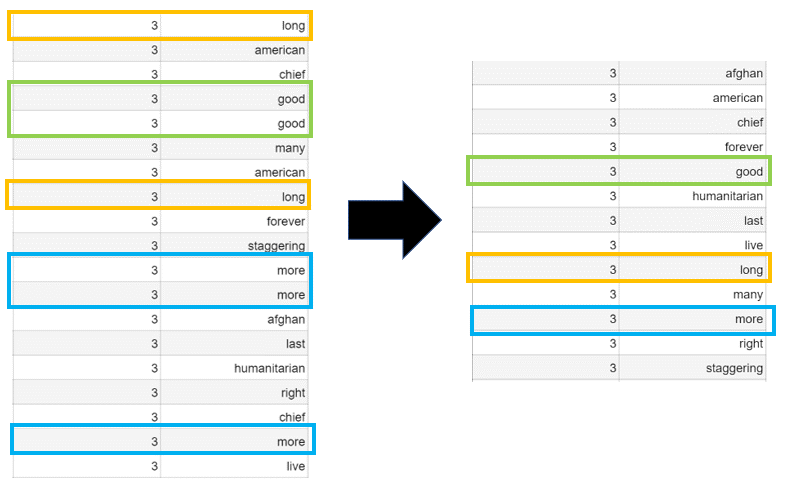

In [40]:
Image('Doc_Token_to_Doc_Type.png')

In [64]:
grouped = doc_df.groupby(['file', 'doc_token']).count()
grouped

Empty DataFrame
Columns: []
Index: [(0, athlete), (0, authority), (0, barnard), (0, block), (0, camp), (0, campus), (0, channel), (0, college), (0, community), (0, condolence), (0, coverage), (0, custody), (0, davide), (0, death), (0, engineering), (0, evening), (0, event), (0, family), (0, freshman), (0, friend), (0, gang), (0, graduate), (0, guy), (0, headline), (0, highlight), (0, history), (0, hospital), (0, injustice), (0, kitchen), (0, knife), (0, major), (0, man), (0, member), (0, minute), (0, murder), (0, news), (0, officer), (0, pain), (0, park), (0, parole), (0, person), (0, place), (0, police), (0, practice), (0, right), (0, shock), (0, soccer), (0, spate), (0, spree), (0, student), (0, suspect), (0, taking), (0, tauru), (0, tessa), (0, thank), (0, tonight), (0, torso), (0, tourist), (0, tragedy), (0, university), (0, video), (0, violence), (0, wave), (0, world), (0, year), (1, abandoning), (1, american), (1, biden), (1, bill), (1, bipartisanship), (1, board), (1, business), (1, but), (1, channel), (1, check), (1, correspondent), (1, cost), (1, cover), (1, coverage), (1, covid), (1, dialing), (1, difference), (1, dollar), (1, evening), (1, event), (1, ground), (1, help), (1, highlight), (1, hold), (1, hope), (1, idea), (1, inability), (1, income), (1, issue), (1, mary), (1, meeting), (1, message), (1, million), (1, money), (1, news), ...]

[425536 rows x 0 columns]

#### remove the file number column to leave only a list of tokens (the 'document types' identified before)

In [65]:
types = grouped.reset_index()['doc_token']
types

0             athlete
1           authority
2             barnard
3               block
4                camp
             ...     
425531     university
425532    vaccination
425533        vaccine
425534          world
425535           year
Name: doc_token, Length: 425536, dtype: object

#### Frequency distibution of the POS words (e.g. nouns)

In [66]:
doc_freq = FreqDist(types)
doc_freq

FreqDist({'people': 4294, 'year': 4227, 'country': 3658, 'time': 3515, 'day': 2988, 'government': 2644, 'news': 2448, 'week': 2138, 'world': 2042, 'month': 1948, ...})

#### Calculate the percentage of docs each word appears in

In [67]:
total_docs = len(texts)
doc_freq_df = pd.DataFrame(doc_freq.most_common(), columns=['word', 'doc_freq'])
doc_freq_df['doc_percentage'] = doc_freq_df['doc_freq'] / total_docs * 100
doc_freq_df

,word,doc_freq,doc_percentage
0,people,4294,51.822351
1,year,4227,51.013758
2,country,3658,44.146754
3,time,3515,42.420951
4,day,2988,36.060825
...,...,...,...
20243,chakla,1,0.012069
20244,gourd,1,0.012069
20245,mummification,1,0.012069
20246,radiocarbon,1,0.012069


#### Merge the frequency and doc frequency dataframes together 
#### And output to csv

In [68]:
df_merged = pd.merge(left=freq_df, right=doc_freq_df, how='left', left_on=['word'],
         right_on = ['word'])

df_merged.to_csv(channel+'_'+part_of_speech+'_frequency.csv', encoding='utf8', index=False)